#### __Bài tập 2:__ Sử dụng hàm probabilistic_hough_line() trong module transform của thư viện scikit-image để phát hiện các đường thẳng từ ảnh. Hàm này khác gì so với hough_line()?

#### __Giải thích code__

#### 1. Nhập các thư viện cần thiết

In [ ]:
# rgb2gray từ skimage.color để chuyển đổi ảnh từ rgb sang grayscale
from skimage.color import rgb2gray                          
# probabilistic_hough_line từ skimage.transform để phát hiện các đường thẳng bằng phép biến đổi Hough xác suất
from skimage.transform import probabilistic_hough_line
# imread từ skimage.io để đọc ảnh
from skimage.io import imread                               
# canny từ skimage.feature để phát hiện cạnh trong ảnh
from skimage.feature import canny                           
# matplotlib.pyplot để vẽ đồ thị và hiển thị ảnh
import matplotlib.pyplot as plt                             

#### 2. Đọc và xử lý ảnh

In [ ]:
# Đọc ảnh từ đường dẫn và chuyển đổi ảnh từ rgb sang grayscale
image = rgb2gray(imread('../images/organic.png'))           
# Sử dụng bộ lọc Canny để phát hiện cạnh trong ảnh grayscale với các tham số sigma=2, low_threshold=30/255, high_threshold=80/255
edges = canny(image, 2, 30/255, 80/255)       
# Sử dụng hàm probabilistic_hough_line để phát hiện các đường thẳng trong ảnh cạnh edges với các tham số threshold=20, line_length=20 và line_gap=5              
lines = probabilistic_hough_line(edges, threshold=20, line_length=20, line_gap=5)

#### 3. Hiển thị kết quả

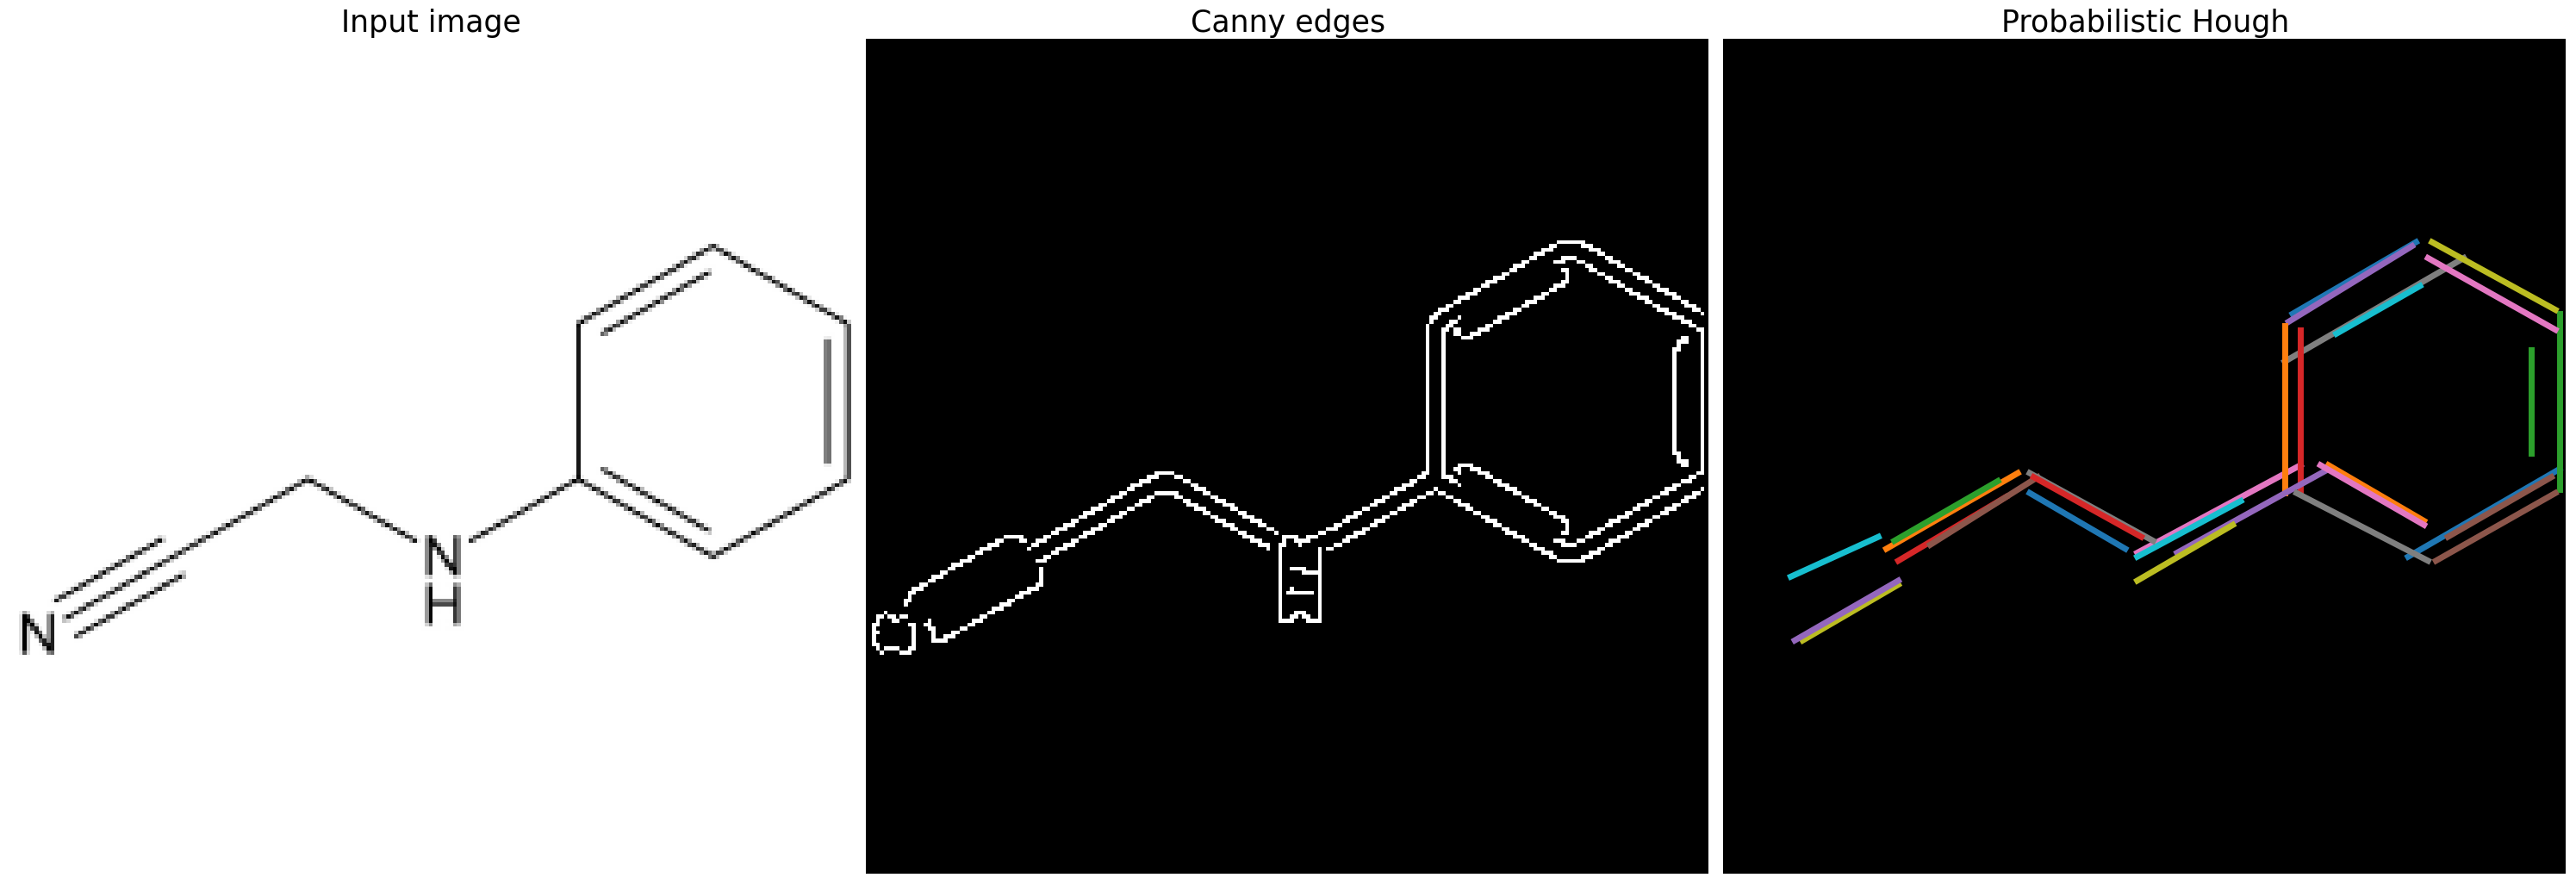

In [ ]:
# Tạo một hình ảnh với kích thước 30x20 inch và chia thành 3 ô (1 hàng, 3 cột)
fig, axes = plt.subplots(1, 3, figsize=(30, 20), sharex=True, sharey=True)
ax = axes.ravel()
plt.gray()
# Hiển thị ảnh gốc image trong ô đầu tiên
ax[0].imshow(image, cmap=plt.cm.gray)           
ax[0].set_title('Input image', size=25)
# Hiển thị ảnh cạnh edges trong ô thứ hai
ax[1].imshow(edges, cmap=plt.cm.gray)           
ax[1].set_title('Canny edges', size=25)
# Hiển thị ảnh trống (ảnh cạnh nhân với 0) trong ô thứ ba và vẽ các đường thẳng được phát hiện bằng hàm probabilistic_hough_line
ax[2].imshow(edges * 0)
# Đặt giới hạn trục x và y cho ô thứ ba để phù hợp với kích thước ảnh gốc
for line in lines:                              
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]), linewidth=5)
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough', size=25)
for a in ax:
    a.set_axis_off()
# Lưu hình ảnh kết quả thành file.jpg
plt.savefig('hough_line_organic.jpg')           
# Tắt các trục tọa độ cho tất cả các ô
plt.axis('off')                                 
plt.tight_layout()
# Hiển thị hình ảnh
plt.show()                                      

#### __Sự khác biệt giữa probabilistic_hough_line và hough_line:__

#### - hough_line thực hiện phép biến đổi Hough đầy đủ để phát hiện tất cả các đường thẳng trong ảnh, sau đó tìm các điểm giao nhau để xác định các đường thẳng.
#### - probabilistic_hough_line là một phiên bản tối ưu hóa của phép biến đổi Hough, chỉ lấy mẫu một phần các điểm cạnh và tìm các đoạn thẳng dựa trên các điểm này. Điều này giúp giảm thời gian tính toán và bộ nhớ cần thiết, đặc biệt là đối với các ảnh lớn hoặc có nhiều cạnh.